In [4]:
!ls

drive  sample_data


In [8]:
import pandas as pd #导入Pandas，用于数据读取和处理
# 读入房价数据，示例代码中的文件地址为internet链接，读者也可以下载该文件到本机进行读取
# 如，当数据集和代码文件位于相同本地目录，路径名应为"./house.csv"，或直接放"house.csv"亦可
df_housing = pd.read_csv("./drive/MyDrive/dataset/house.csv")
df_housing.head() # 显示加州房价数据

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [9]:
X = df_housing.drop("median_house_value",axis = 1) #构建特征集X
y = df_housing.median_house_value #构建标签集y

In [10]:
from sklearn.model_selection import train_test_split #导入数据集拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y,
         test_size=0.2, random_state=0) #以80%/20%的比例进行数据集的拆分

In [11]:
from sklearn.linear_model import LinearRegression #导入线性回归算法模型
model = LinearRegression() #使用线性回归算法
model.fit(X_train, y_train) #用训练集数据，训练机器，拟合函数，确定参数

LinearRegression()

In [12]:
y_pred = model.predict(X_test) #预测测试集的Y值
print ('房价的真值(测试集)',y_test, sep=';')
print ('预测的房价(测试集)',y_pred)

房价的真值(测试集);3873     171400.0
3625     189600.0
3028     500001.0
13814    229400.0
15398    163400.0
           ...   
1363     212500.0
7947     210500.0
14574    142900.0
10009    128300.0
9149      84700.0
Name: median_house_value, Length: 3400, dtype: float64
预测的房价(测试集) [211157.06335417 218581.64298574 465317.31295563 ... 201751.23969631
 160873.51846958 138847.26913352]


In [13]:
print("给预测评分：", model.score(X_test, y_test)) #评估预测结果

给预测评分： 0.632101417157948


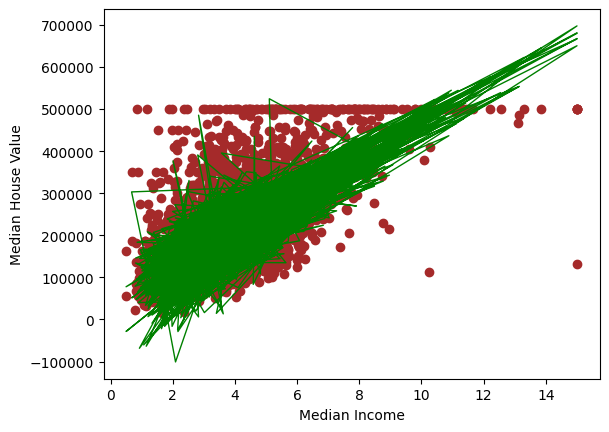

In [14]:
import matplotlib.pyplot as plt #导入matplotlib画图库
#用散点图显示家庭收入中位数和房价中位数的分布
plt.scatter(X_test.median_income, y_test,  color='brown')
#画出回归函数(从特征到预测标签)
plt.plot(X_test.median_income, y_pred, color='green', linewidth=1)
plt.xlabel('Median Income') #X轴-家庭收入中位数
plt.ylabel('Median House Value') #Y轴-房价中位数
plt.show() #显示房价分布和机器习得的函数图形